# Import libraries

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
PATH = "data/nyc-taxi/"

# Load data feather format

In [3]:
%%time
train_df = pd.read_feather('tmp/taxi-train-v6-chkpt5')

Wall time: 3.05 s


In [4]:
test_df = pd.read_feather('tmp/taxi-test-v6-chkpt5')

In [5]:
train_df.shape, test_df.shape

((54053965, 24), (9914, 23))

In [10]:
train_df.year = (train_df.year+2000).astype('uint16')
test_df.year = (test_df.year+2000).astype('uint16')

In [11]:
display(train_df.head())
display(train_df.tail())

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_distance,latitude_distance,simple_distance,year,...,hour,pickup_distance_to_nyc,dropoff_distance_to_nyc,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,fare_increased
0,4.5,-73.844315,40.721317,-73.841614,40.712276,1,0.002701,-0.009041,0.011742,2009,...,17,0.170201,0.164858,0.146182,0.134440,0.361934,0.355594,0.085261,0.097003,False
1,16.9,-74.016045,40.711304,-73.979271,40.782005,1,0.036774,0.070702,0.107475,2010,...,16,0.011543,0.095932,0.307898,0.341826,0.180190,0.287665,0.207702,0.110383,False
2,5.7,-73.982735,40.761269,-73.991241,40.750561,2,-0.008507,-0.010708,0.019215,2011,...,0,0.071732,0.052517,0.324553,0.322352,0.263465,0.244250,0.124427,0.143642,False
3,7.7,-73.987129,40.733143,-73.991570,40.758091,1,-0.004440,0.024948,0.029388,2012,...,4,0.039212,0.059719,0.300822,0.330210,0.230945,0.251452,0.156947,0.136440,False
4,5.3,-73.968094,40.768009,-73.956657,40.783764,1,0.011436,0.015755,0.027191,2010,...,7,0.093113,0.120304,0.316653,0.320971,0.284846,0.312037,0.103046,0.089528,False


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_distance,latitude_distance,simple_distance,year,...,hour,pickup_distance_to_nyc,dropoff_distance_to_nyc,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,fare_increased
54053960,14.0,-74.005272,40.740028,-73.963280,40.762554,1,0.041992,0.022526,0.064518,2014,...,3,0.027954,0.092472,0.325850,0.306384,0.219687,0.284205,0.168205,0.103687,True
54053961,4.2,-73.957787,40.765530,-73.951637,40.773960,1,0.006149,0.008430,0.014580,2009,...,20,0.100941,0.115521,0.303866,0.306147,0.292674,0.307254,0.095218,0.080638,False
54053962,14.1,-73.970505,40.752323,-73.960541,40.797340,1,0.009964,0.045017,0.054981,2011,...,22,0.075016,0.129998,0.303378,0.338431,0.266749,0.321731,0.121143,0.106988,False
54053963,28.9,-73.980904,40.764629,-73.870605,40.773964,1,0.110298,0.009335,0.119633,2011,...,5,0.076924,0.196556,0.326083,0.225119,0.268657,0.388289,0.119235,0.006324,False
54053964,7.5,-73.969719,40.797668,-73.970886,40.783314,1,-0.001167,-0.014355,0.015522,2014,...,11,0.121148,0.105626,0.347937,0.334750,0.312881,0.297359,0.116494,0.103307,True


In [12]:
display(test_df.head())
display(test_df.tail())

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_distance,latitude_distance,simple_distance,year,month,...,hour,pickup_distance_to_nyc,dropoff_distance_to_nyc,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,fare_increased
0,-73.973320,40.763805,-73.981430,40.743835,1,-0.008110,-0.019970,0.028080,2015,1,...,13,0.083683,0.055603,0.317677,0.305817,0.275417,0.247337,0.112480,0.140560,True
1,-73.986862,40.719383,-73.998886,40.739201,1,-0.012024,0.019817,0.031841,2015,1,...,13,0.025719,0.033512,0.286797,0.318638,0.217453,0.225246,0.170444,0.162651,True
2,-73.982521,40.751259,-73.979652,40.746140,1,0.002869,-0.005119,0.007988,2011,10,...,11,0.061935,0.059685,0.314331,0.306343,0.253670,0.251419,0.134228,0.136478,False
3,-73.981163,40.767807,-73.990448,40.751637,1,-0.009285,-0.016171,0.025455,2012,12,...,21,0.079842,0.054386,0.329521,0.322636,0.271576,0.246120,0.116322,0.141777,True
4,-73.966049,40.789776,-73.988564,40.744427,1,-0.022514,-0.045349,0.067863,2012,12,...,21,0.116924,0.049061,0.336376,0.313541,0.308659,0.240795,0.104935,0.147102,True


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_distance,latitude_distance,simple_distance,year,month,...,hour,pickup_distance_to_nyc,dropoff_distance_to_nyc,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr,fare_increased
9909,-73.968124,40.796997,-73.955643,40.780388,6,0.012482,-0.016609,0.029091,2015,5,...,12,0.122070,0.117943,0.345673,0.316582,0.313805,0.309677,0.114231,0.085140,True
9910,-73.945511,40.803600,-73.960213,40.776371,6,-0.014702,-0.027229,0.041931,2015,1,...,17,0.151287,0.109356,0.329662,0.317135,0.343021,0.301090,0.098221,0.086807,True
9911,-73.991600,40.726608,-73.789742,40.647011,6,0.201859,-0.079597,0.281456,2015,4,...,20,0.028206,0.281998,0.298759,0.017303,0.219940,0.427238,0.167957,0.214138,True
9912,-73.985573,40.735432,-73.939178,40.801731,6,0.046394,0.066299,0.112694,2015,1,...,1,0.043056,0.155750,0.301556,0.321461,0.234791,0.347485,0.153107,0.090019,True
9913,-73.988022,40.754070,-74.000282,40.759220,6,-0.012260,0.005150,0.017410,2015,1,...,14,0.059246,0.052135,0.322643,0.340054,0.250980,0.243870,0.136917,0.144028,True


# Group and aggregate by year-month

In [13]:
# Group all training data rides by month+year combination and aggregate them by count, mean, median, min and max
fare_grouped_df = train_df.fare_amount.groupby([train_df.year,train_df.month])

fare_count_df = fare_grouped_df.count()
fare_mean_df = fare_grouped_df.mean()
fare_median_df = fare_grouped_df.median()
fare_min_df = fare_grouped_df.min()
fare_max_df = fare_grouped_df.max()

In [14]:
# for drawing barchart, so we don't have to retype the following everytime
def draw_barchart(df, title):
    fig = plt.figure(figsize=(20, 4))
    ax = fig.add_subplot(111)
    df.plot(kind='bar')
    ax.set_xlabel("(Year, Month)")
    plt.title(title)
    plt.show()

## Monthly ride count

In [15]:
 fare_count_df.describe()

count        78.000000
mean     692999.551282
std       45043.546655
min      546378.000000
25%      671778.500000
50%      700111.500000
75%      721763.750000
max      772727.000000
Name: fare_amount, dtype: float64

We also do the aggregate by count for test data, since we are only concern with the **count** of rides here, not the **fare**. We can then compare this with training data.

In [19]:
test_group_df = test_df.simple_distance.groupby([test_df.year,test_df.month]).count()

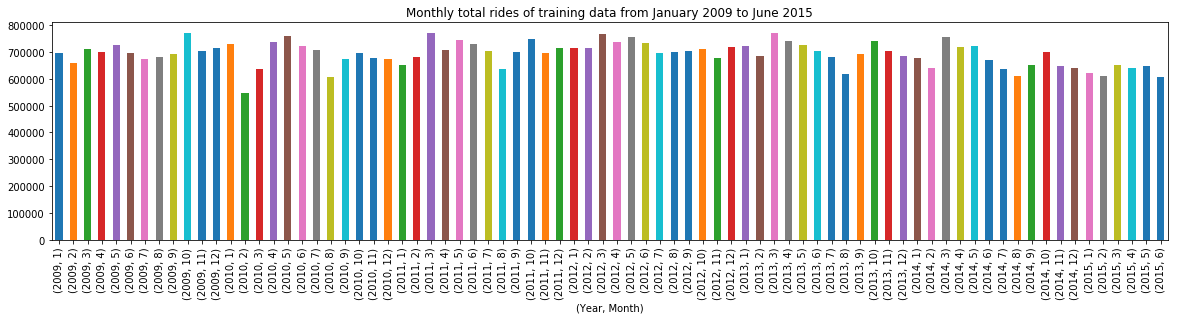

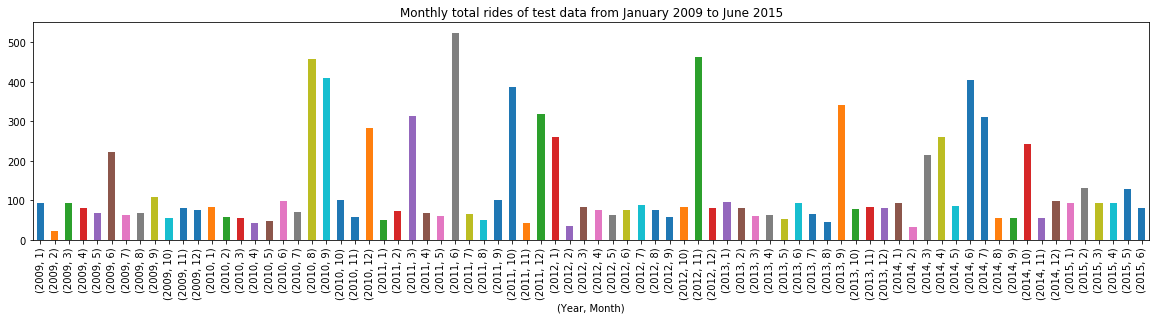

In [20]:
draw_barchart(fare_count_df, 'Monthly total rides of training data from January 2009 to June 2015')
draw_barchart(test_group_df, 'Monthly total rides of test data from January 2009 to June 2015')

While training data barchart has a relative uniform monthly total rides, the test data monthly total rides are not spread evenly, with some random huge spikes. We might need to consider this when we create our validation set.

## Monthly mean fare

In [21]:
fare_mean_df.describe()

count    78.000000
mean     11.342658
std       1.290332
min       9.569753
25%      10.185231
50%      10.641822
75%      12.682742
max      13.547895
Name: fare_amount, dtype: float64

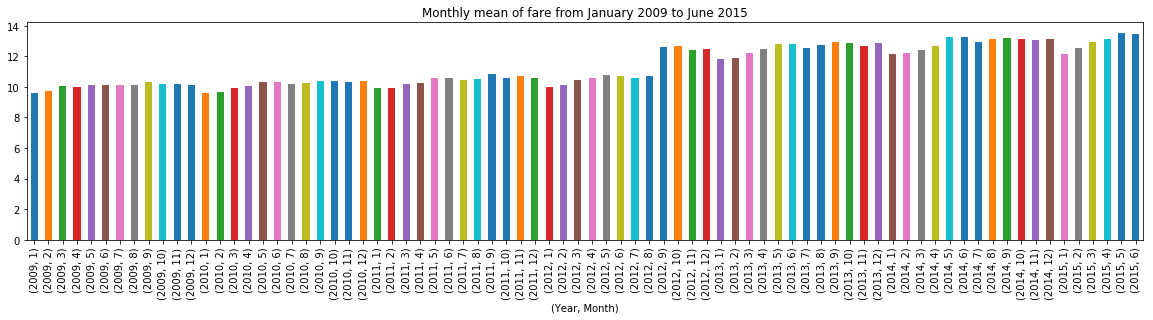

In [22]:
draw_barchart(fare_mean_df,'Monthly mean of fare from January 2009 to June 2015')

From January 2009 until September 2012, the monthly mean fare is quite uniform. 

There is a gradual increase from January until December before it dropped again on January of following year.

However, there is a big jump from October 2012 onwards. The monthly mean fare increased by about \$3 during this period. Probably a price increase at this point onwards.

The pattern where the monthly mean fare drops from December to January remains true during this period.

## Monthly median fare

In [23]:
fare_median_df.describe()

count    78.000000
mean      8.487180
std       0.847205
min       7.300000
25%       7.700000
50%       8.100000
75%       9.500000
max      10.000000
Name: fare_amount, dtype: float64

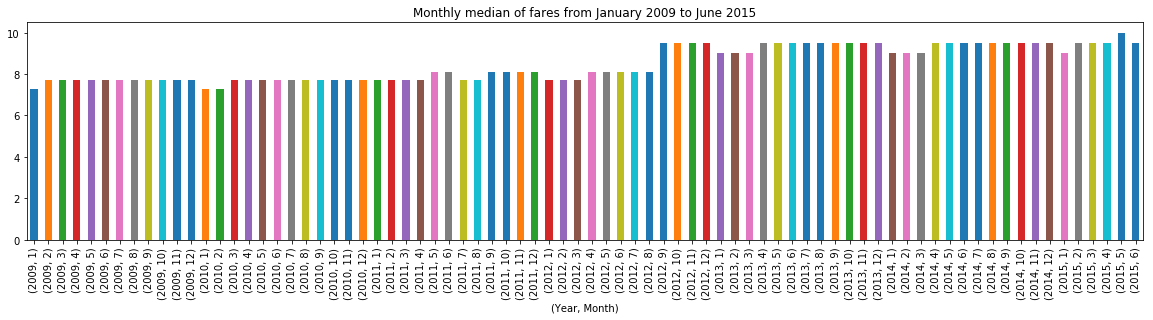

In [24]:
draw_barchart(fare_median_df,'Monthly median of fares from January 2009 to June 2015')

Here we can see the median is relatively uniform from January 2009 to September 2012

Not surprisingly, as we've seen in the monthly mean fare bar chart, there is a big jump from October 2012 onwards. 

The monthly median fare increased permanently by about almost \$2.00 during this period of September 2012 to June 2015.

A quick Google search verifies this:

https://www.nytimes.com/2012/09/04/nyregion/new-york-taxis-to-start-charging-increased-rates.html

One idea is we can create a boolean column based on the month and year to indicate whether it is before or after the price increase. This will help our model to learn better.

## Monthly minimum fare

In [25]:
fare_min_df.describe()

count    78.0
mean      2.5
std       0.0
min       2.5
25%       2.5
50%       2.5
75%       2.5
max       2.5
Name: fare_amount, dtype: float64

http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml

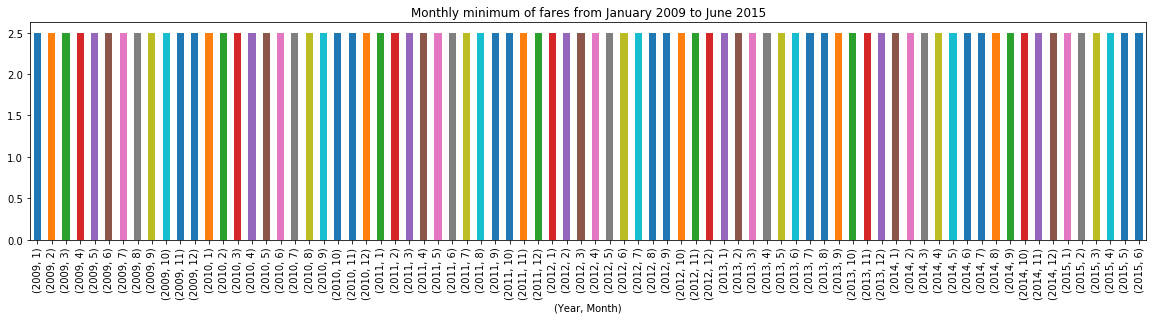

In [35]:
draw_barchart(fare_min_df, 'Monthly minimum of fares from January 2009 to June 2015')

Many minimum fare outliers fall in simply a few periods, such as February 2010, March 2010, August 2013, and January to June of 2015. 

Removing all rows with fare below \$.250 will remove those outliers.

## Monthly maximum fare

In [36]:
fare_max_df.describe()

count     78.000000
mean     234.800888
std       20.308619
min      187.000000
25%      215.555000
50%      250.000000
75%      250.000000
max      250.000000
Name: fare_amount, dtype: float64

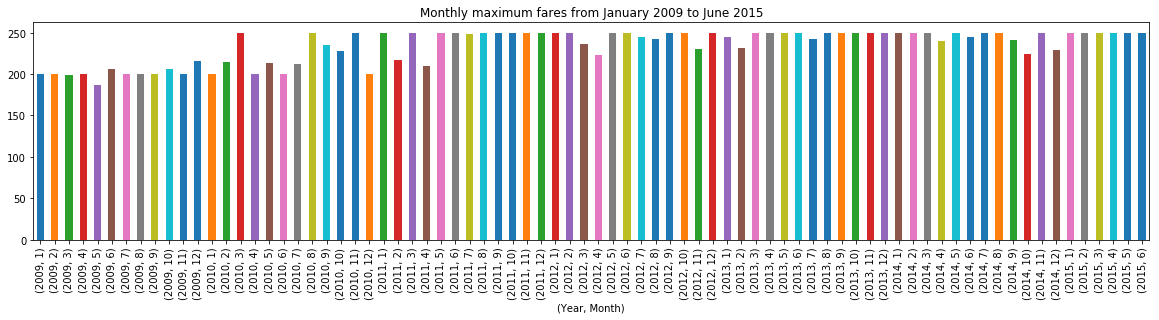

In [38]:
draw_barchart(fare_max_df, 'Monthly maximum fares from January 2009 to June 2015')